## feature selection - information gain - also known as mutual information in classification problem statements

- MI helps estimate the mutual information for discrete target variables [meaning this is only used in classification problems].
- this measures the dependancy between two random variables - and this value will always be non negative.
- if two random variables have no dependancy on each other[they're independant], this value will be zero. higher the value, higher the dependancy
- this method relies on non parametric method based on entropy estimation from k nearest neighbors distances.

In [1]:
import pandas as pd 
import numpy as np

In [18]:
df = pd.read_csv('wine.csv')

In [19]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
X = df.drop(['Wine'],axis=1)
y = df['Wine']

## train test split to avoid overfitting 

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_yest = train_test_split(X,y,random_state=0,test_size=0.3)

## how do we perform feature selection using information gain?

In [28]:
from sklearn.feature_selection import mutual_info_classif
# determine mutual information 
mutual_info = mutual_info_classif(X_train,y_train)

array([0.42029596, 0.30070937, 0.16107478, 0.24384906, 0.1810376 ,
       0.47867546, 0.71025509, 0.16015287, 0.26559146, 0.6225643 ,
       0.53913909, 0.54211499, 0.5347236 ])

In [29]:
mutual_info = pd.Series(mutual_info)

In [31]:
mutual_info.index = X_train.columns

In [32]:
mutual_info.sort_values(ascending=False)

Flavanoids              0.710255
Color.int               0.622564
OD                      0.542115
Hue                     0.539139
Proline                 0.534724
Phenols                 0.478675
Alcohol                 0.420296
Malic.acid              0.300709
Proanth                 0.265591
Acl                     0.243849
Mg                      0.181038
Ash                     0.161075
Nonflavanoid.phenols    0.160153
dtype: float64

### depicting values in mutual_info

<AxesSubplot: >

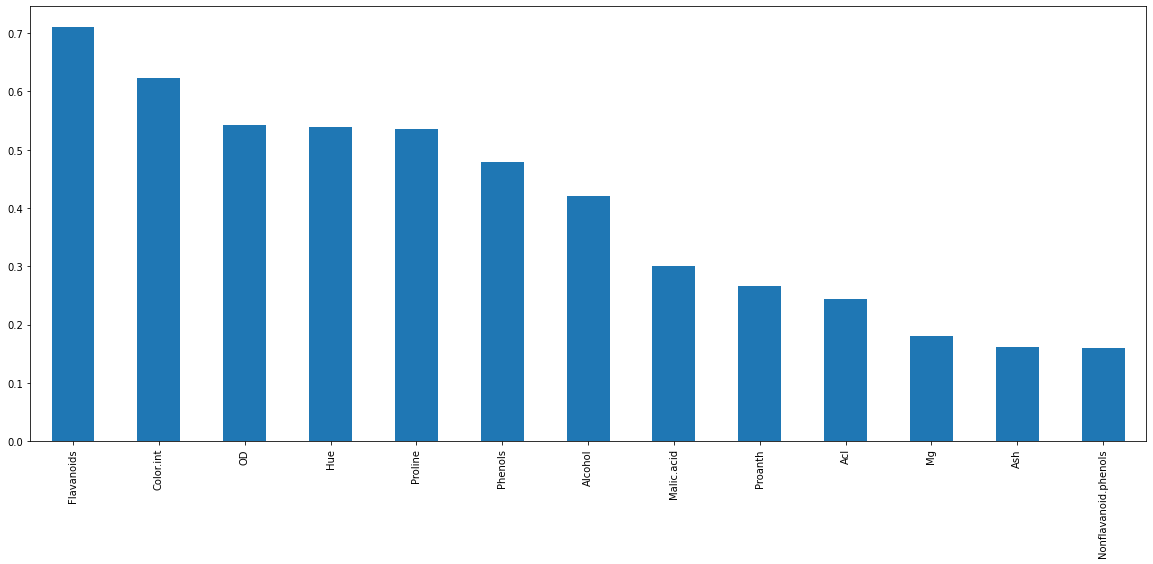

In [36]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [39]:
from sklearn.feature_selection import SelectKBest

In [41]:
sel5best = SelectKBest(mutual_info_classif,k=5)
sel5best.fit(X_train,y_train)
X_train.columns[sel5best.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

difference between f test and mutual information
-  https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py